
Validation Accuracy: 0.544535200311163

Test Accuracy: 0.5495883967071736

Classification Report (Test Data):
               precision    recall  f1-score   support

        FAKE       0.51      0.51      0.51      1169
        REAL       0.58      0.58      0.58      1382

    accuracy                           0.55      2551
   macro avg       0.55      0.55      0.55      2551
weighted avg       0.55      0.55      0.55      2551



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


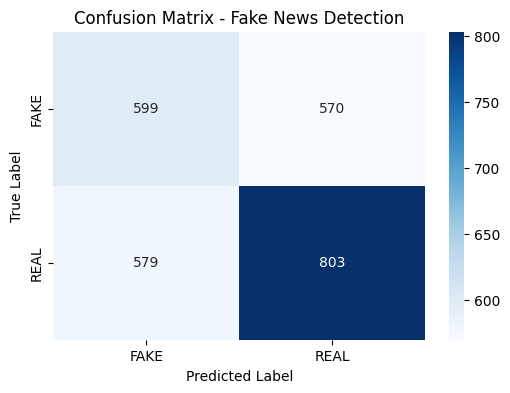

/tmp/ipython-input-2546553316.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="Set2")


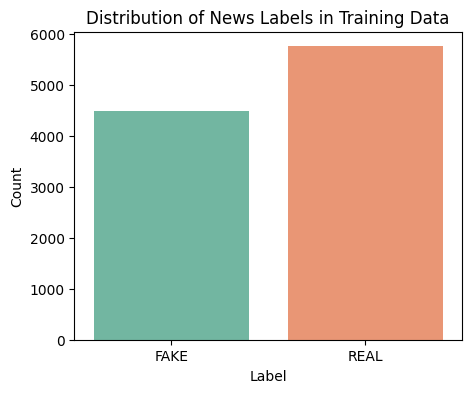

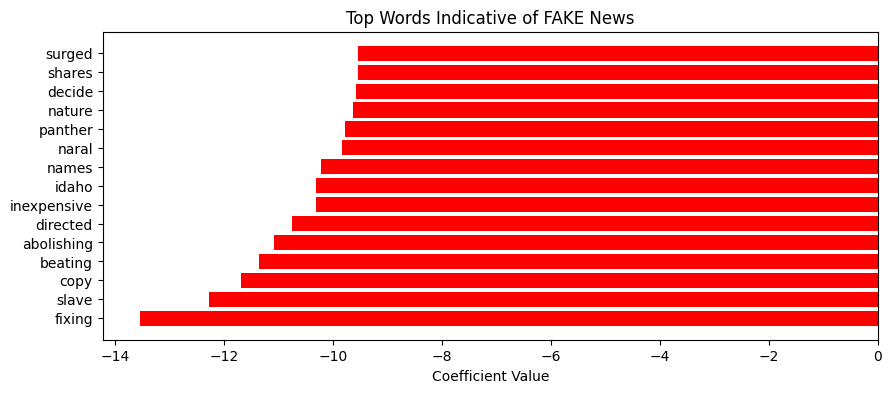

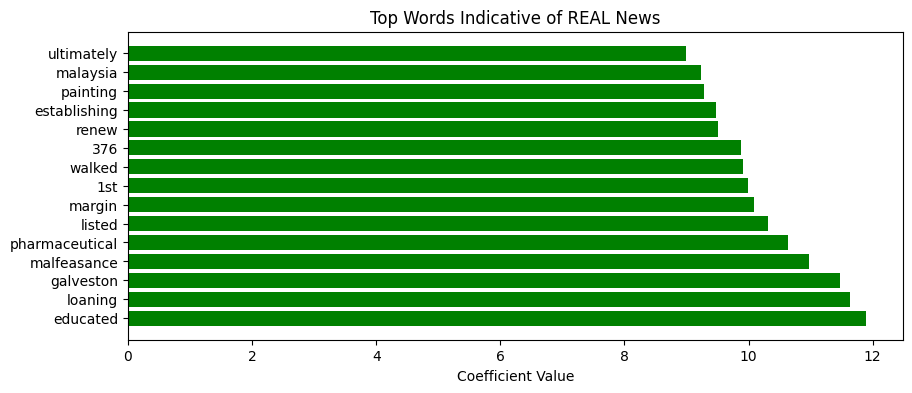


Sample Prediction: FAKE


In [5]:
# ===============================
# Fake News Detection Project
# ===============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ===== Load Data =====
train_df = pd.read_excel("train.csv.xlsx")
valid_df = pd.read_excel("valid.csv.xlsx")
test_df = pd.read_excel("test.csv.xlsx")

# ===== Label Normalization =====
def normalize_labels(df):
    return (
        df["Label"]
        .astype(str)
        .str.strip()
        .str.lower()
        .map({"true": "REAL", "false": "FAKE"})
        .fillna("FAKE")
    )

y_train = normalize_labels(train_df)
y_valid = normalize_labels(valid_df)
y_test = normalize_labels(test_df)

X_train = train_df["Statement"]
X_valid = valid_df["Statement"]
X_test = test_df["Statement"]

# ===== Vectorization =====
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_valid = vectorizer.transform(X_valid)
tfidf_test = vectorizer.transform(X_test)

# ===== Model Training =====
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

# ===== Evaluation =====
y_valid_pred = pac.predict(tfidf_valid)
y_test_pred = pac.predict(tfidf_test)

print("\nValidation Accuracy:", accuracy_score(y_valid, y_valid_pred))
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred))

# ===== Confusion Matrix =====
cm = confusion_matrix(y_test, y_test_pred, labels=["FAKE", "REAL"])
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["FAKE", "REAL"], yticklabels=["FAKE", "REAL"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Fake News Detection")
plt.show()

# ===== Class Distribution =====
plt.figure(figsize=(5,4))
sns.countplot(x=y_train, palette="Set2")
plt.title("Distribution of News Labels in Training Data")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# ===== Top Keywords =====
feature_names = vectorizer.get_feature_names_out()
coefs = pac.coef_[0]
top_fakes = sorted(zip(coefs, feature_names))[:15]
top_reals = sorted(zip(coefs, feature_names), reverse=True)[:15]

# FAKE
plt.figure(figsize=(10,4))
plt.barh([w for c,w in top_fakes], [c for c,w in top_fakes], color="red")
plt.title("Top Words Indicative of FAKE News")
plt.xlabel("Coefficient Value")
plt.show()

# REAL
plt.figure(figsize=(10,4))
plt.barh([w for c,w in top_reals], [c for c,w in top_reals], color="green")
plt.title("Top Words Indicative of REAL News")
plt.xlabel("Coefficient Value")
plt.show()

# ===== Sample Prediction =====
sample_text = ["Government confirms new health policy to improve hospitals"]
sample_vec = vectorizer.transform(sample_text)
prediction = pac.predict(sample_vec)
print("\nSample Prediction:", prediction[0])
